<a href="https://colab.research.google.com/github/syedsharin/Seoul-Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

##<b> Import Modules

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
#to display all the graph in the workbook 
sns.set_style("whitegrid",{'grid.linestyle': '--'})
from sklearn.ensemble import BaggingRegressor
from sklearn.datasets import make_regression

## <b> Loading the dataset

In [3]:
data= pd.read_csv("SeoulBikeData.csv", encoding = "ISO-8859-1")

In [4]:
# Copy the data for backup
df = data.copy()

In [5]:
# Getting feel of the data
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


Data pre-processing
Understanding data

In [6]:
# Data shape
df.shape

(8760, 14)

In [7]:
# data dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [8]:
# Statistical info 
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,8760,365,01/12/2017,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rented Bike Count,8760.0,NaN,NaN,NaN,704.602055,644.997468,0.0,191.0,504.5,1065.25,3556.0
Hour,8760.0,NaN,NaN,NaN,11.5,6.922582,0.0,5.75,11.5,17.25,23.0
Temperature(°C),8760.0,NaN,NaN,NaN,12.882922,11.944825,-17.8,3.5,13.7,22.5,39.4
Humidity(%),8760.0,NaN,NaN,NaN,58.226256,20.362413,0.0,42.0,57.0,74.0,98.0
Wind speed (m/s),8760.0,NaN,NaN,NaN,1.724909,1.0363,0.0,0.9,1.5,2.3,7.4
Visibility (10m),8760.0,NaN,NaN,NaN,1436.825799,608.298712,27.0,940.0,1698.0,2000.0,2000.0
Dew point temperature(°C),8760.0,NaN,NaN,NaN,4.073813,13.060369,-30.6,-4.7,5.1,14.8,27.2
Solar Radiation (MJ/m2),8760.0,NaN,NaN,NaN,0.569111,0.868746,0.0,0.0,0.01,0.93,3.52
Rainfall(mm),8760.0,NaN,NaN,NaN,0.148687,1.128193,0.0,0.0,0.0,0.0,35.0


##<b> Preprocessing the data

In [9]:
# Checking null values of data 
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [10]:
# Checking duplicate
df.duplicated().sum()

0

In [11]:
# converting date column dtype object to date 
#df['Date']=pd.to_datetime(df['Date'])
from datetime import datetime

date_string = "13/12/2017"
date_format = "%d/%m/%Y"

try:
    date_obj = datetime.strptime(date_string, date_format)
    print(date_obj)
except ValueError as e:
    print(f"Error: {e}")


2017-12-13 00:00:00


In [12]:
# split day of week, month and year in three column
#df['day_of_week'] = df['Date'].dt.day_name() # extract week name from Date column
#df["month"] = df['Date'].dt.month_name()   # extract month name from Date column
#df["year"] = df['Date'].map(lambda x: x.year).astype("object")     # extract year from Date column and convert it in object type 

In [13]:
# drop the Date column
df.drop(columns=['Date'],inplace=True)

##<b> Exploratory data analysis 

##<b> When we observe the data we realize that Hour column is a numerical column but it is a time stamp so we have to treat Hour as a categorical feature

In [14]:
# convert Hour column integer to Categorical 
df['Hour']=df['Hour'].astype('object')

In [15]:
# Divide Data in categorical and numerical features
numeric_features= df.select_dtypes(exclude='object')
categorical_features=df.select_dtypes(include='object')

In [16]:
numeric_features.head()

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0


In [17]:
categorical_features.head()

,Hour,Seasons,Holiday,Functioning Day
0,0,Winter,No Holiday,Yes
1,1,Winter,No Holiday,Yes
2,2,Winter,No Holiday,Yes
3,3,Winter,No Holiday,Yes
4,4,Winter,No Holiday,Yes


In [18]:
# checking categorical column value count
for i in categorical_features.columns:
  print("\n ")
  print('column name  : ', i)
  print(df[i].value_counts())


 
column name  :  Hour
Hour
0     365
1     365
22    365
21    365
20    365
19    365
18    365
17    365
16    365
15    365
14    365
13    365
12    365
11    365
10    365
9     365
8     365
7     365
6     365
5     365
4     365
3     365
2     365
23    365
Name: count, dtype: int64

 
column name  :  Seasons
Seasons
Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: count, dtype: int64

 
column name  :  Holiday
Holiday
No Holiday    8328
Holiday        432
Name: count, dtype: int64

 
column name  :  Functioning Day
Functioning Day
Yes    8465
No      295
Name: count, dtype: int64


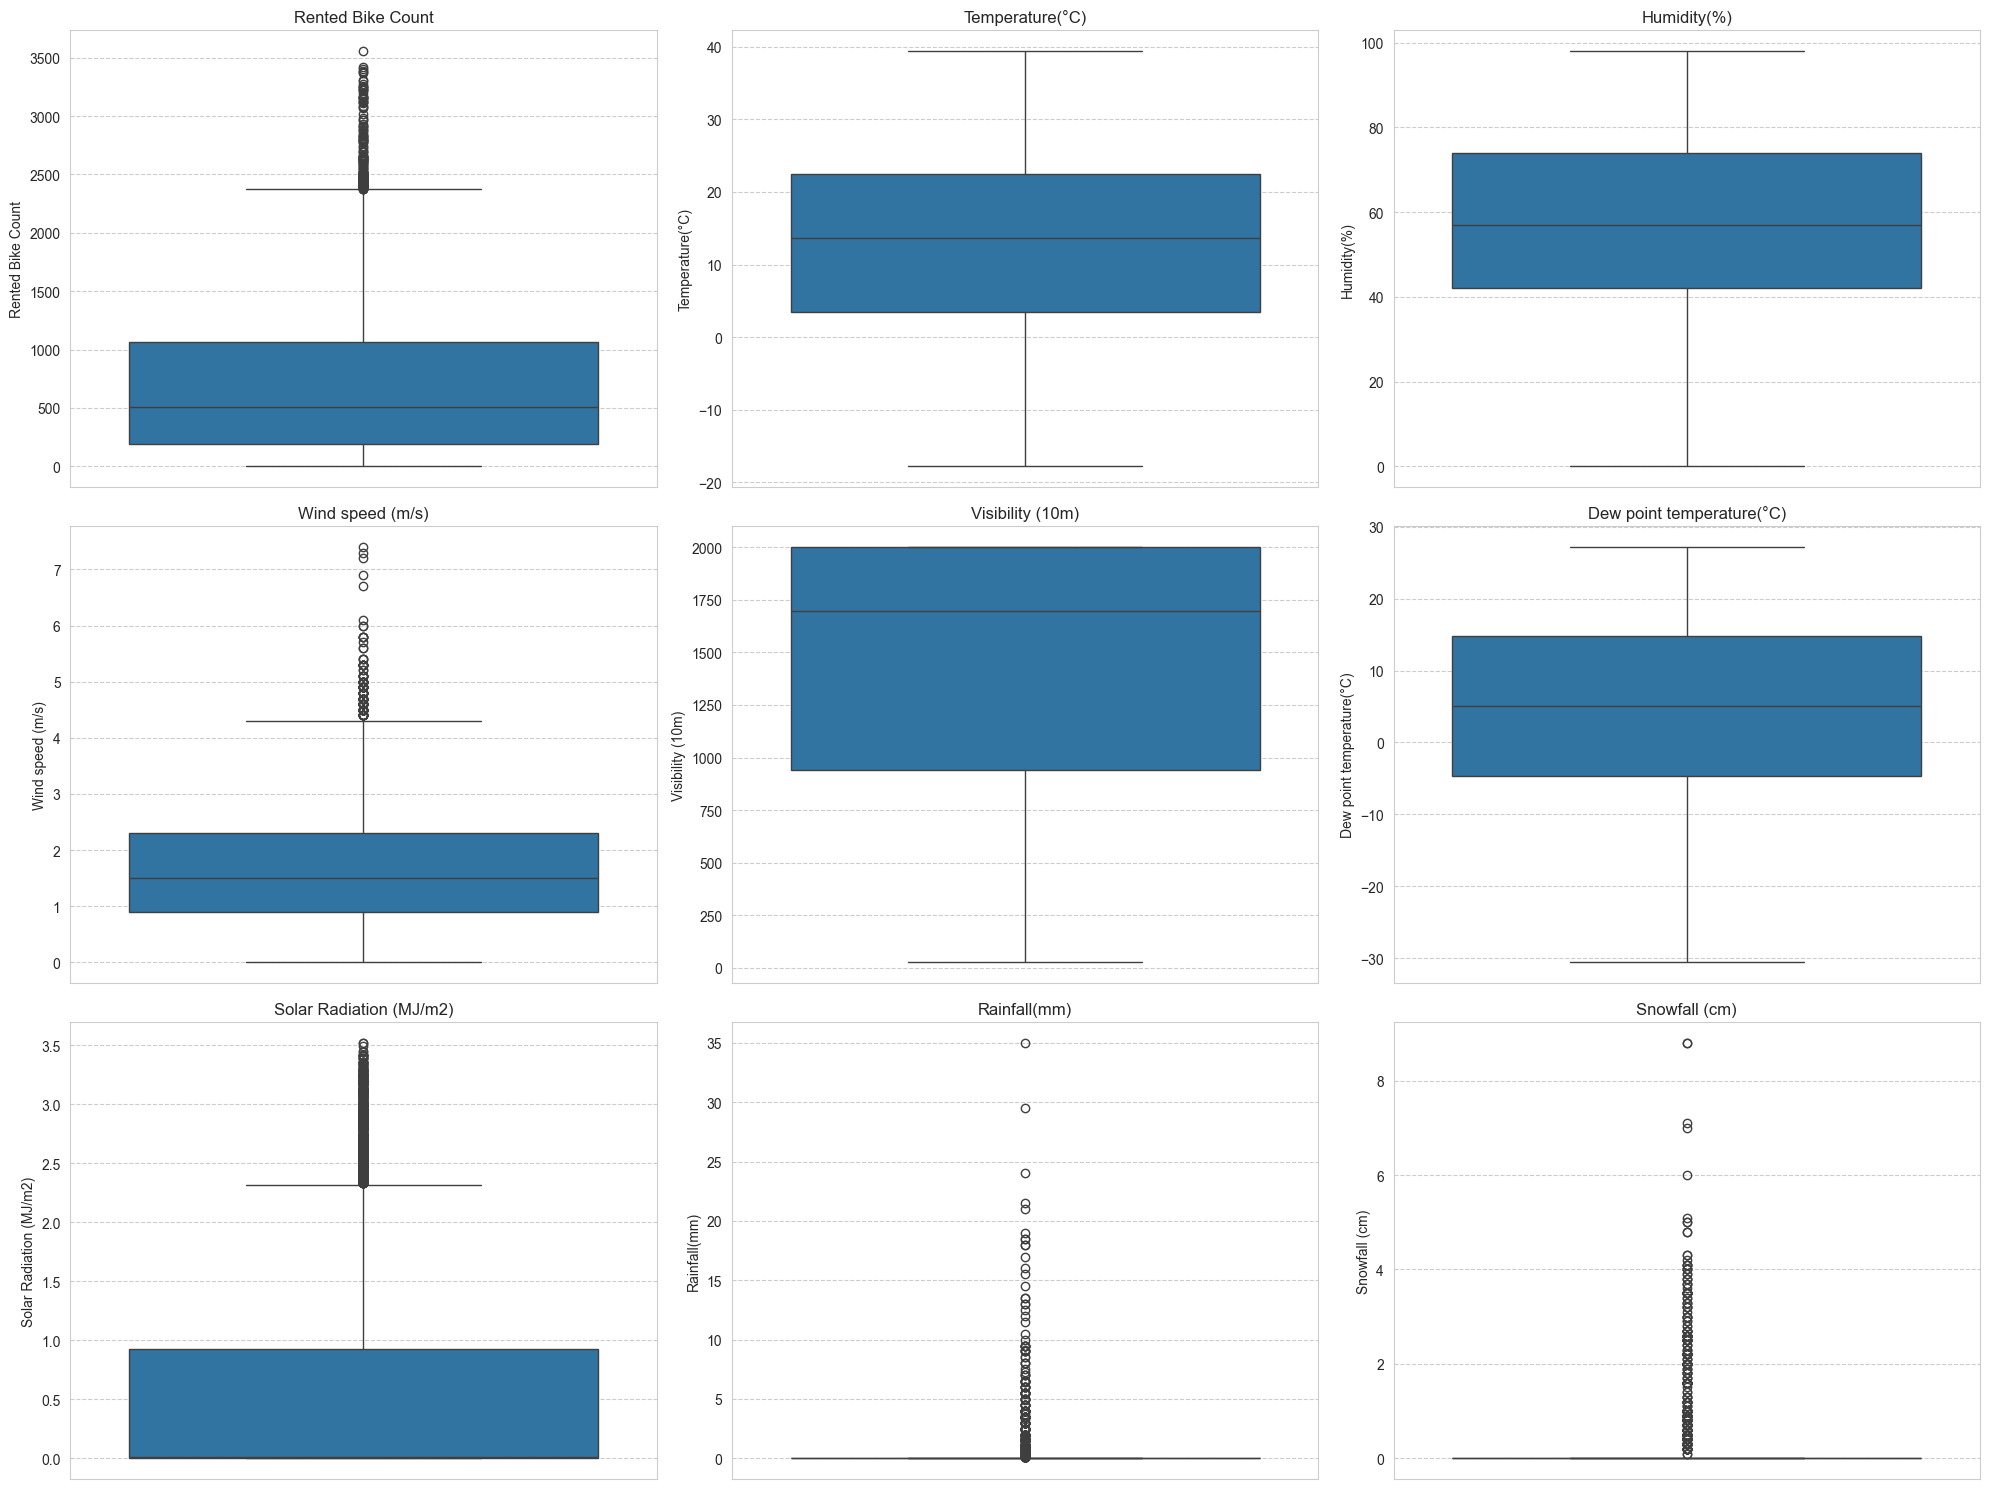

In [19]:
# checking Outliers with seaborn boxplot
n = 1
plt.figure(figsize=(20,15))

for i in numeric_features.columns:
  plt.subplot(3,3,n)
  n=n+1
  sns.boxplot(df[i])
  plt.title(i)
  plt.tight_layout()

We don't think of worry about outliers in this data 

##<b> Explore our categorical feature and Trying to take some important information from the categorical feature

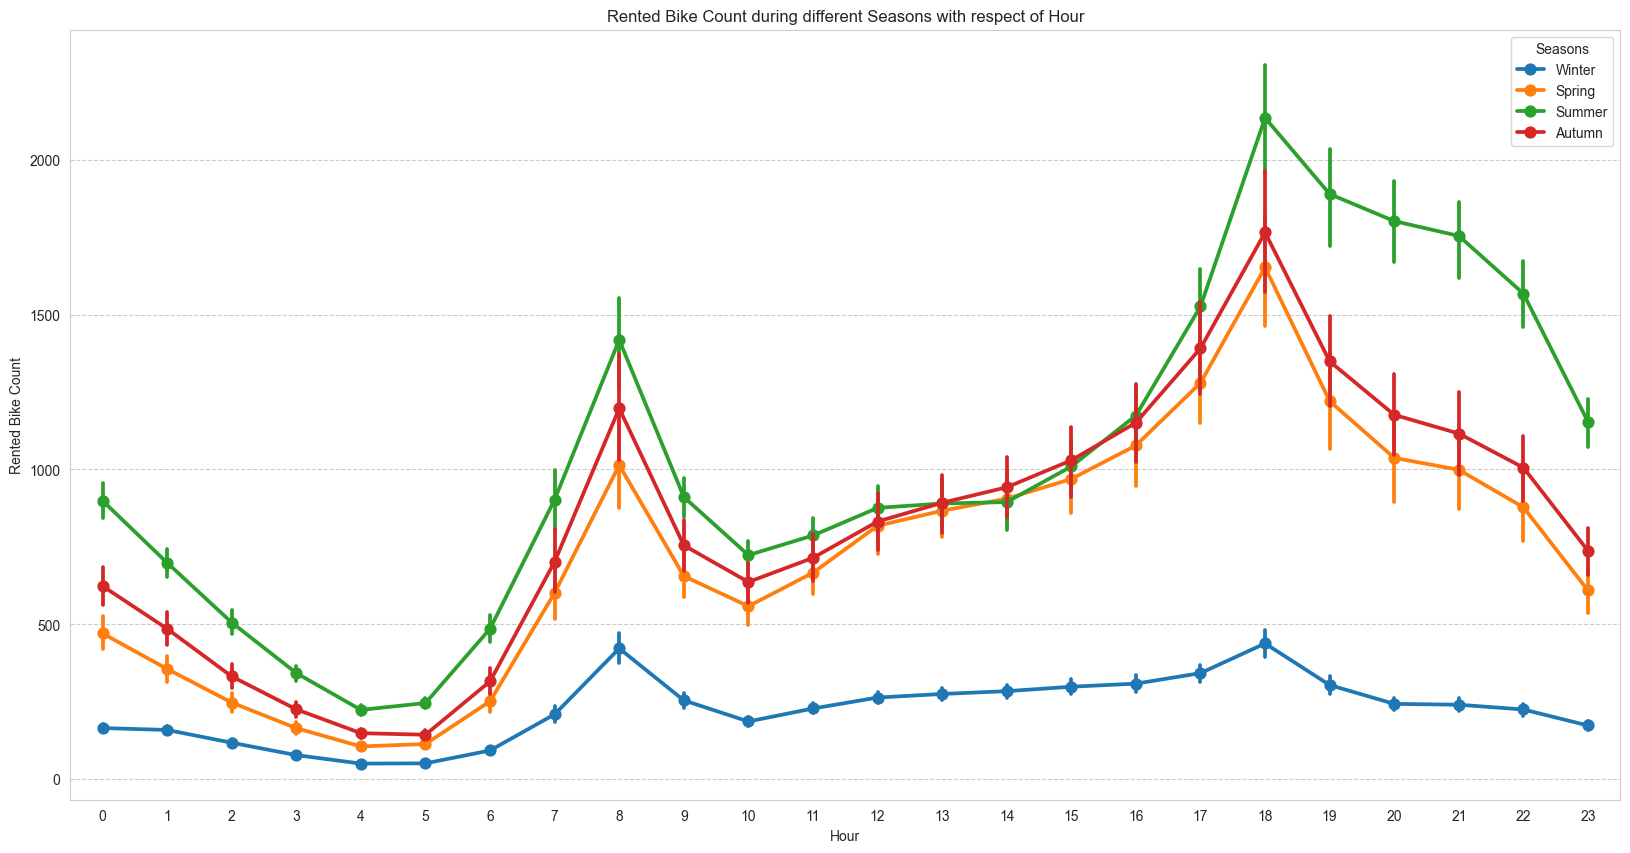

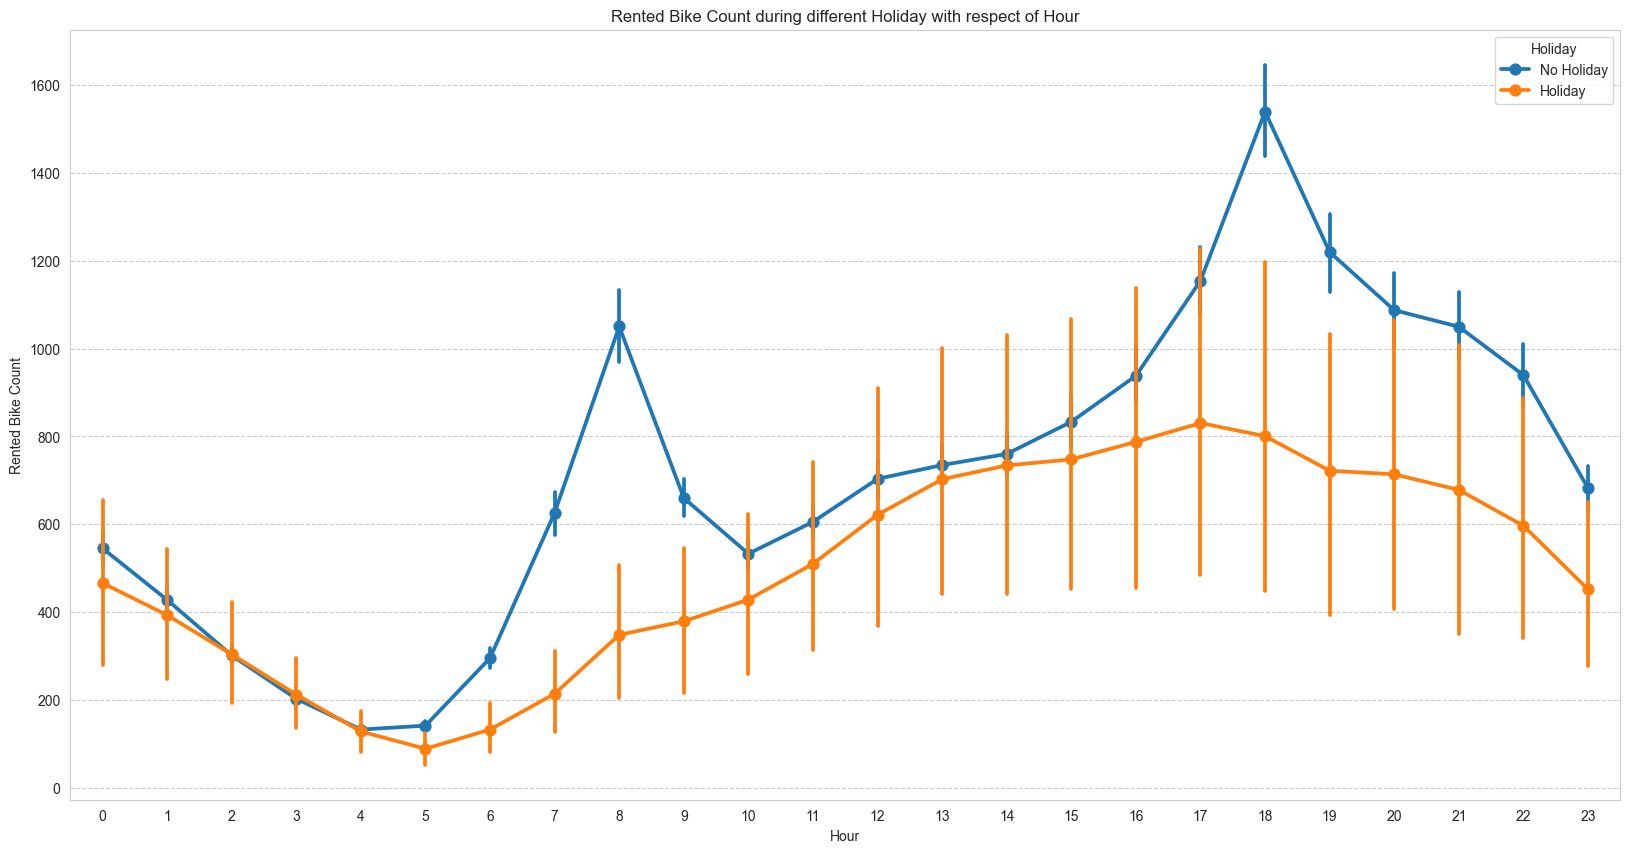

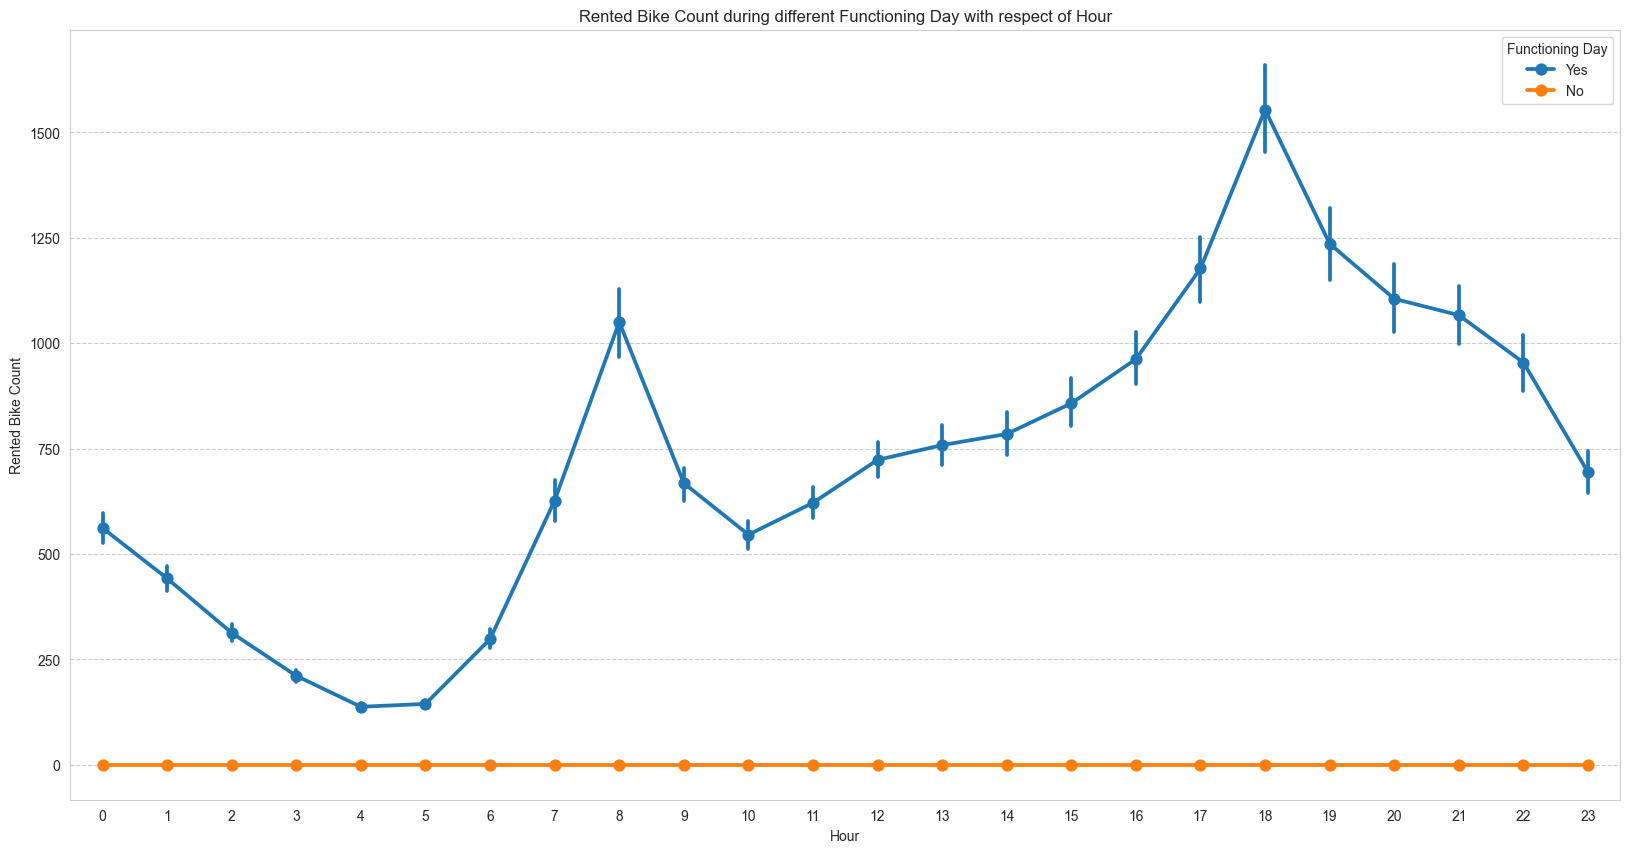

In [20]:
# we create point plots with Rented Bike Count during different categorical features with respect of Hour
for i in categorical_features.columns:
  if i == 'Hour':
    pass
  else:
    plt.figure(figsize=(20,10))
    sns.pointplot(x=df["Hour"],y=df['Rented Bike Count'],hue=df[i])
    plt.title(f"Rented Bike Count during different {i} with respect of Hour")
  plt.show()

##<b> Observation 
From all these pointplot we have observed a lot from every column like :

## Season 
In the season column, we are able to understand that the demand is low in the winter season.

## Holiday
In the Holiday column, The demand is low during holidays, but in no holidays the demand is high, it may be because people use bikes to go to their work.

## Functioning Day
In the Functioning Day column, If there is no Functioning Day then there is no demand

## Days of week
In the Days of week column, We can observe from this column that the pattern of weekdays and weekends is different, in the weekend the demand becomes high in the afternoon. While the demand for office timings is high during weekdays, **we can further change this column to weekdays and weekends.**

## month 
In the month column, We can clearly see that the demand is low in December January & Febuary, It is cold in these months and we have already seen in season column that demand is less in winters.

## year
The demand was less in 2017 and higher in 2018, it may be because it was new in 2017 and people did not know much about it.

In [21]:
# Converting days of weeks in Two variable from Monaday to Friday in Weekdays and Saturday and Sunday to Weekend
df['week'] = df['day_of_week'].apply(lambda x:'Weekend'  if x=='Saturday' or  x== 'Sunday' else 'Weekdays')

KeyError: 'day_of_week'

In [ ]:
# value counts of Week column
df.week.value_counts()

In [ ]:
# Getting feel of week column with pointplot  
plt.figure(figsize=(15,7))
sns.pointplot(x=df["Hour"],y=df['Rented Bike Count'],hue=df['week'])
plt.title("Rented Bike Count during weekday and weekend with respect of Hour")

## Now we can clearly see the pattern which shows that the demand is high in the afternoon on the weekend. While there is more demand during office hours in weekdays

## Now we can drop the days of week column

In [ ]:
# droping the days of week column from df and from categorical feature 
df.drop(columns=['day_of_week'], inplace=True)
categorical_features.drop(columns=['day_of_week'], inplace=True)

##<b> 

##<b> Now the time of Explore our numerical feature and Trying to take some important information from the Numeical feature

##<b> Pays little attention to the skewness of our numerical features

In [ ]:
# Distrubution of Data
n=1
plt.figure(figsize=(20,15))
for i in numeric_features.columns:
  plt.subplot(3,3,n)
  n=n+1
  sns.distplot(df[i])
  plt.title(i)
  plt.tight_layout()

# In this plots we observe that some of our columns is right skewed and some are left skewed we have to remember this things when we apply algorithms

## Right skewed columns are
Rented Bike Count (Its also our Dependent variable), 
Wind speed (m/s),
Solar Radiation (MJ/m2),
Rainfall(mm),
Snowfall (cm),

## Left skewed columns are
Visibility (10m), 
Dew point temperature(°C)


##<b> Let's try something else to get information from our Numerical features

In [ ]:
#plotting histogram of all the numeric features of the dataset
for col in numeric_features[:]:
  fig=plt.figure()
  ax=fig.gca()
  feature=df[col]
  feature.hist(bins=50,ax=ax)
  ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
  ax.set_title(col)

## From this we are coming to know that the features which are skewed, their mean and the median are also skewed, which was understood by looking at the graph that this would happen.

##<b> Lets try to find how is the relation of numerical features with our dependent variable

In [ ]:
# Regression plot to know relation with our independent variable
n=1
plt.figure(figsize=(15,15))
for i in numeric_features.columns:
  if i == 'Rented Bike Count':
    pass
  else:
    plt.subplot(4,2,n)
    n+=1
    sns.regplot(df[i], df['Rented Bike Count'],scatter_kws={"color": "cyan"}, line_kws={"color": "red"})
    plt.title(f'Dependend variable and {i}')
    plt.tight_layout()

## This regression plots shows that some of our features are positive linear and some are negative linear in relation to our target variable.

## <b> Now is the time to know what is the correlation of our dependent variable with the independent features

In [ ]:
# Correlation with Rented Bike Count
df.corr()['Rented Bike Count']

## As we saw in the regression plot that some features are negatively correlated and some positive, we are seeing the same thing here as well.

##<b> Let us see the correlation of all the numerical features with the heat map, so that we will also get to know the multilinearity.

In [ ]:
# using seaborn heatmap for ploting correlation graph 
plt.figure(figsize=(10,8))
sns.heatmap(abs(df.corr()), cmap='coolwarm', annot=True)

## From this graph we are able to see that there is multicollinearity in temperature(°C) and dev point temperature(°C) column.

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','Dew point temperature(°C)']]])

In [ ]:
df.drop(columns=['Dew point temperature(°C)'],inplace=True)

In [ ]:
df.head(2)

In [ ]:
new_df=pd.get_dummies(df,drop_first=True,sparse=True)

In [ ]:
new_df.head(2)

##<b> We saw that our dependent variable is right skewed, it needs to be normalized.
##We do some experiments to normalize it

In [ ]:
fig,axes = plt.subplots(1,3,figsize=(20,5))
sns.distplot(np.log10(new_df['Rented Bike Count']+0.0000001),ax=axes[0],color='red').set_title("log 10")
sns.distplot((new_df['Rented Bike Count']**2),ax=axes[1],color='red').set_title("square")
sns.distplot(np.sqrt(new_df['Rented Bike Count']),ax=axes[2], color='green').set_title("Square root")

## Our data in green plot is normalized to some extent: so we will go with square root on our dependent variable

## Divide data in dependent feature and Independent feature

In [ ]:
X = new_df.drop(columns='Rented Bike Count')
y = np.sqrt(new_df['Rented Bike Count'])

In [ ]:
# Train test split our data
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25,random_state=42)

## Geeting Feel of my X_train, X_test, y_train, y_test

In [ ]:
X_train.head()

In [ ]:
X_test.head()

In [ ]:
y_train.head()

In [ ]:
y_test.head()

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

## Creating a function for calculate score

In [ ]:
def score_metrics(actual,predicted):
  mae = mean_absolute_error(actual**2,predicted**2)
  print('mean absolute error is  :',mae)
  mse = mean_squared_error(actual**2,predicted**2)
  print('mean squared error is  :',mse)
  print('Root mean squared error is  :',np.sqrt(mse))
  print("R2 score is  :",r2_score(actual**2,predicted**2))


## transforming X_train and X_test

In [ ]:
yeo = PowerTransformer()
X_train = yeo.fit_transform(X_train)
X_test = yeo.transform(X_test)

# Model 1 Linear Regression

In [ ]:
# Fitting the model
regression = LinearRegression()
regression.fit(X_train,y_train)

In [ ]:

regression.score(X_train,y_train)

In [ ]:
#predicting 
reg_pred = regression.predict(X_test)

In [ ]:
score_metrics(y_test,reg_pred)

In [ ]:
 regression.coef_

In [ ]:
regression.intercept_

# Lasso

In [ ]:
L1 = Lasso(alpha=0.001, max_iter=1000)
L1.fit(X_train,y_train)
L1.score(X_train,y_train)

In [ ]:
L1_pred = L1.predict(X_test)
score_metrics(y_test,L1_pred)

In [ ]:
L1.coef_

In [ ]:
L1.intercept_

## Cross Validation

In [ ]:
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

In [ ]:
lasso_pred = lasso_regressor.predict(X_test)
score_metrics(y_test,lasso_pred)

## Ridge

In [ ]:
L2 = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100,0.5,1.5,1.6,1.7,1.8,1.9]}
L2_regressor = GridSearchCV(L2, parameters, scoring='neg_mean_squared_error', cv=5)
L2_regressor.fit(X_train,y_train)

In [ ]:
print("The best fit alpha value is found out to be :" ,L2_regressor.best_params_)
print("\nUsing ",L2_regressor.best_params_, " the negative mean squared error is: ", L2_regressor.best_score_)

In [ ]:
L2_pred = L2_regressor.predict(X_test)
score_metrics(y_test,L2_pred)

## Polynomial 

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures()
poly_X_train = poly.fit_transform(X_train)
poly_X_test = poly.transform(X_test)

In [ ]:
poly_X_train[:5]

In [ ]:
poly_X_test[:5]

In [ ]:
regression.fit(poly_X_train,y_train)

In [ ]:
regression.score(poly_X_train,y_train)

In [ ]:
poly_pred = regression.predict(poly_X_test)

In [ ]:
score_metrics(y_test,poly_pred)

##<b> Decission Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
tree = DecisionTreeRegressor()

## RandomForest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

## Bagging

In [ ]:
from sklearn.ensemble import BaggingRegressor

In [ ]:
len(X_train)

In [ ]:
n_est = [100]

In [ ]:
sample = [1000]

In [ ]:
#BR = BaggingRegressor(base_estimator=base,n_estimators=10,max_samples=1000,random_state=42)

In [ ]:
#BR.fit(X_train,y_train)

In [ ]:
RF = RandomForestRegressor()